In [1]:
%pip install git+https://github.com/rusty1s/pytorch_geometric.git
%pip install lightning
!pip3 install torch torchvision torchaudio
%pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cpu.html
%pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-bv87q7sd
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-bv87q7sd
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit 90883f00d2702e17030ef2331dfe7c3d237f7320
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cpu.html
Note: you may need to re

In [1]:
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T

def get_dataset(dataset_name='Cora'):
    path = 'dataset/' + dataset_name    
    if dataset_name in ['Cora', 'CiteSeer', 'PubMed']:
        return Planetoid(root=path, name=dataset_name, transform=T.NormalizeFeatures())
    
    else:
        raise NotImplementedError
    
dataset = get_dataset('Cora')


print(dataset[0])

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [89]:
import torch

def add_random_edges(dataset, num_edges_to_add):

    while num_edges_to_add > 0:
        
        # Generate two random numbers within the range of the node indices
        x, y = torch.randint(2708, (2,))

        # If x and y are equal, generate new x and y
        if x == y:
            continue

        # Check if the edge already exists in the edge_index
        if not ((dataset.data.edge_index[0] == x) & (dataset.data.edge_index[1] == y)).any():

            # Add the edge [x, y] and [y, x] to the edge_index
            dataset.data.edge_index = torch.cat([dataset.data.edge_index, torch.tensor([[x, y], [y, x]])], dim=1)
            num_edges_to_add =  num_edges_to_add - 1

    return dataset

In [90]:
cora = add_random_edges(dataset, 528)
print(cora.edge_index.shape)

torch.Size([2, 11612])


In [109]:
dataset.data.num_edges

/home/madars/.local/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:289: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


10556

In [110]:
print(dataset.data.edge_index)

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])


In [93]:
import numpy as np

def sort_edge_index(edge_index):
    # Convert edge_index to numpy arrays
    source_nodes = edge_index[0].numpy()
    target_nodes = edge_index[1].numpy()

    # Use numpy's lexsort function
    sorted_indices = np.lexsort((target_nodes, source_nodes))

    # Convert sorted_indices back to a torch tensor
    sorted_indices = torch.from_numpy(sorted_indices)

    # Use the sorted indices to sort edge_index
    sorted_edge_index = edge_index.index_select(1, sorted_indices)

    return sorted_edge_index

In [94]:
dataset.data.edge_index = sort_edge_index(dataset.data.edge_index)

In [95]:
print(dataset.data)

Data(x=[2708, 1433], edge_index=[2, 11612], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


bring 1056 from the end :

In [97]:
print(dataset.edge_index[:, -528*2:])

tensor([[2352, 2352, 2353,  ..., 2707, 2707, 2707],
        [1064, 1129,  577,  ...,  598, 1473, 2706]])


In [30]:
edge_dict = {0:(0,633),1:(0,1862),2:(0,2582),3:(2707,1473),4:(0,50),5:(1,470),6:(1,332)}

print(dataset.data.y[1477])
print(dataset.data.y[1542])

# print(dataset.data.y[0])
# print(dataset.data.y[1862])

# print(dataset.data.y[0])
# print(dataset.data.y[2582])

# print(dataset.data.y[2707])
# print(dataset.data.y[1473])

# print(dataset.data.y[0])
# print(dataset.data.y[50])

# print(dataset.data.y[1])
# print(dataset.data.y[470])

# print(dataset.data.y[1])
# print(dataset.data.y[332])

# print(dataset.data.y[1])
# print(dataset.data.y[2615])

# print(dataset.data.y[1])
# print(dataset.data.y[1454])



tensor(3)
tensor(3)


In [2]:
print('node features:',dataset.num_node_features)

node features: 1433


In [ ]:
print('edge features:',dataset.num_edge_features)

In [ ]:
print('edge features:',dataset.data.num_nodes)

In [12]:
print('x is the feature matrix, where each row corresponds to a node feature vector.')
print(dataset.x)

x is the feature matrix, where each row corresponds to a node feature vector.
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [13]:
print('the features vector of the first node')
print(dataset.x[0].shape)
dataset.x[0]

the features vector of the first node
torch.Size([1433])


tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [3]:
print('edge_index is a torch tensor of size [2, num_edges], where each column is an edge.')
print(dataset.edge_index)

edge_index is a torch tensor of size [2, num_edges], where each column is an edge.
tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])


In [6]:
dataset.data.is_undirected()

/home/madars/.local/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:289: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


True

In [4]:
print('y is a torch tensor of size [num_nodes].')  ## num_nodes => val of num_classes
print(dataset.y)

y is a torch tensor of size [num_nodes].
tensor([3, 4, 4,  ..., 3, 3, 3])


In [5]:
print('train_mask is a boolean vector denoting which nodes belong to the training set.')
print(dataset.train_mask)

train_mask is a boolean vector denoting which nodes belong to the training set.
tensor([ True,  True,  True,  ..., False, False, False])


In [ ]:
print('val_mask is a boolean vector denoting which nodes belong to the validation set.')
print(dataset.val_mask)

In [ ]:
print('test_mask is a boolean vector denoting which nodes belong to the test set.')
print(dataset.test_mask)

sampler = NeighborSampler (edge_index , sizes , batch_size , shuffle , node_idx)

**edge_index => that defines the underlying graph connectivity/message passing flow,
                holds the indices of a (sparse) symmetric adjacency matrix.
                messages from nodes edge_index[0] are sent to nodes edge_index[1].

**sizes => The number of neighbors to sample for each node in each layer.

**node_idx => The nodes that should be considered for creating mini-batches.

In [98]:
dataset.data.edge_index.shape[1]

10556

In [100]:
train_mask = torch.full(dataset.data.edge_index[0, :].shape, False)
print(train_mask.shape)

torch.Size([10556])


/home/madars/.local/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:289: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [107]:
from torch_geometric.data import NeighborSampler
import random
import torch

total_nodes = dataset.data.num_nodes
num_train_nodes = int(total_nodes * 0.6)
num_test_nodes = total_nodes - num_train_nodes

node_indices = list(range(total_nodes))
random.shuffle(node_indices)

train_node_indices = torch.tensor(node_indices[:num_train_nodes])
test_node_indices = torch.tensor(node_indices[num_train_nodes:])


# create mask for train edges
train_mask_edges = torch.full(dataset.data.edge_index[0, :].shape, False)
for i in range(0, dataset.data.edge_index.shape[1]):
    if(dataset.data.edge_index[0, i] in train_node_indices and dataset.data.edge_index[1, i] in train_node_indices):
        train_mask_edges[i] = True
        
cnt=0
for i in range(0,len(train_mask_edges)):
    if(train_mask_edges[i] == True):
          cnt=cnt+1
print(cnt) 

# create mask for test edges
test_mask_edges = torch.full(dataset.data.edge_index[0, :].shape, False)
for i in range(0, dataset.data.edge_index.shape[1]):
    if(dataset.data.edge_index[0, i] in test_node_indices and dataset.data.edge_index[1, i] in test_node_indices):
        test_mask_edges[i] = True
        
cnt=0
for i in range(0,len(test_mask_edges)):
    if(test_mask_edges[i] == True):
          cnt=cnt+1 
         
print(cnt)


# create mask for train edges
odd1 = torch.full(dataset.data.edge_index[0, :].shape, False)
for i in range(0, dataset.data.edge_index.shape[1]):
    if(dataset.data.edge_index[0, i] in train_node_indices and dataset.data.edge_index[1, i] in test_node_indices):
        odd1[i] = True
    elif (dataset.data.edge_index[0, i] in test_node_indices and dataset.data.edge_index[1, i] in train_node_indices):
        odd1[i] = True
        
cnt=0
for i in range(0,len(odd1)):
    if(odd1[i] == True):
          cnt=cnt+1
print(cnt) 








# train_mask_source = (dataset.data.edge_index[0, :] == train_node_indices.unsqueeze(1)).any(dim=0)
# train_mask_target = (dataset.data.edge_index[1, :] == train_node_indices.unsqueeze(1)).any(dim=0)
# train_mask = train_mask_source & train_mask_target

# # create mask for test edges
# test_mask_source = (dataset.data.edge_index[0, :] == test_node_indices.unsqueeze(1)).any(dim=0)
# test_mask_target = (dataset.data.edge_index[1, :] == test_node_indices.unsqueeze(1)).any(dim=0)
# test_mask = test_mask_source & test_mask_target

# train_edges = dataset.data.edge_index[:, train_mask]   
# test_edges = dataset.data.edge_index[:, test_mask]

# print('train edges:', train_edges.shape)
# print('test edges:', test_edges.shape)


3970
1592
4994


In [76]:
dataset.data.edge_index[0, :]

tensor([   0,    0,    0,  ..., 2707, 2707, 2707])

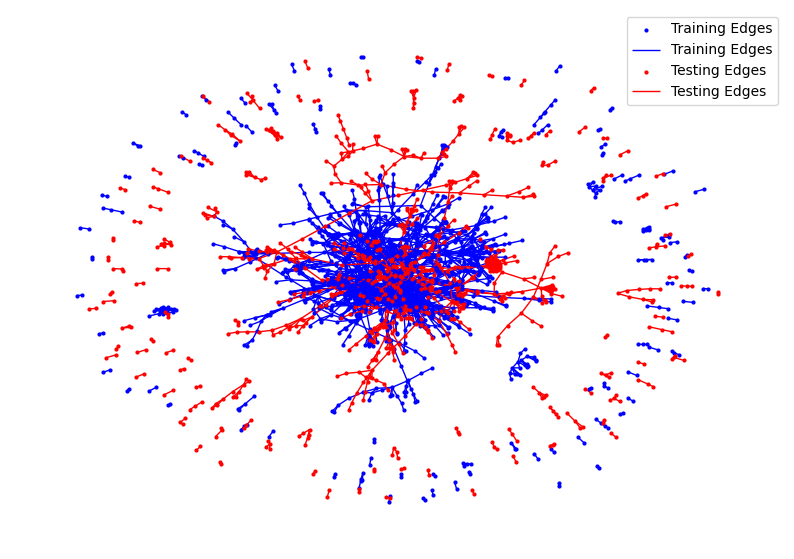

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert edge lists to networkx graphs
G_train = nx.from_edgelist(train_edges.t().numpy())
G_test = nx.from_edgelist(test_edges.t().numpy())

# Create plot
fig, ax = plt.subplots(figsize=(10, 7))

# Draw training graph
nx.draw(G_train, ax=ax, node_size=4, node_color='blue', edge_color='blue', label='Training Edges')

# Draw testing graph
nx.draw(G_test, ax=ax, node_size=4,node_color='red', edge_color='red', label='Testing Edges')

plt.legend()
plt.show()

true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


In [112]:
from torch_geometric.data import NeighborSampler
import random
import torch

num_nodes = dataset.data.num_nodes
print('num_nodes')
print(num_nodes)
node_idx = list(range(num_nodes))
print('node_idx')
print(node_idx)
random.shuffle(node_idx)
print('shuffle-node_idx')
print(node_idx)
shuffled_index = torch.LongTensor(node_idx)
print(shuffled_index)

sampler = NeighborSampler(dataset.data.edge_index, sizes=[0, 6], batch_size=1,
                                  shuffle=False, node_idx=shuffled_index)

num_nodes
2708
node_idx
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

/home/madars/.local/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


In [113]:
sampler.return_e_id

True

In [103]:
sampler.sizes

[0, 6]

In [7]:
from torch_geometric.utils import to_undirected
def process_samples(batch_size, n_id, adj):
        edge_index = adj[0].edge_index
        if edge_index.size(1) != 0:
            edge_index = to_undirected(edge_index)
        n_nodes = len(n_id)
        edge_sp_adj = torch.sparse.FloatTensor(edge_index,
                                               torch.ones(edge_index.shape[1]),
                                               [n_nodes, n_nodes])
        edge_adj = edge_sp_adj
        return [dataset.data.x[n_id], dataset.data.y[n_id[0]], edge_adj]

we take the first sampler of node id -> 2067

In [80]:
for s in sampler:
    print('batch_size')
    print(s[0])
    print('n_id')
    print(s[1])
    print('(edge_index, e_id, size)')
    print(s[2])

batch_size
1
n_id
tensor([ 258, 2645, 1401,  963, 1153, 1094,   89])
(edge_index, e_id, size)
[EdgeIndex(edge_index=tensor([[1, 2, 3, 4, 5, 6],
        [0, 0, 0, 0, 0, 0]]), e_id=tensor([10409,  5562,  3737,  4500,  4258,   373]), size=(7, 1)), EdgeIndex(edge_index=tensor([], size=(2, 0), dtype=torch.int64), e_id=tensor([], dtype=torch.int64), size=(1, 1))]
batch_size
1
n_id
tensor([ 649, 1457, 1171])
(edge_index, e_id, size)
[EdgeIndex(edge_index=tensor([[1, 2],
        [0, 0]]), e_id=tensor([5778, 4582]), size=(3, 1)), EdgeIndex(edge_index=tensor([], size=(2, 0), dtype=torch.int64), e_id=tensor([], dtype=torch.int64), size=(1, 1))]
batch_size
1
n_id
tensor([1739, 2221, 1766, 1317, 1709, 1358,  616])
(edge_index, e_id, size)
[EdgeIndex(edge_index=tensor([[1, 2, 3, 4, 5, 6],
        [0, 0, 0, 0, 0, 0]]), e_id=tensor([9181, 7146, 5124, 6852, 5397, 2521]), size=(7, 1)), EdgeIndex(edge_index=tensor([], size=(2, 0), dtype=torch.int64), e_id=tensor([], dtype=torch.int64), size=(1, 1))]
batc

Ego1:
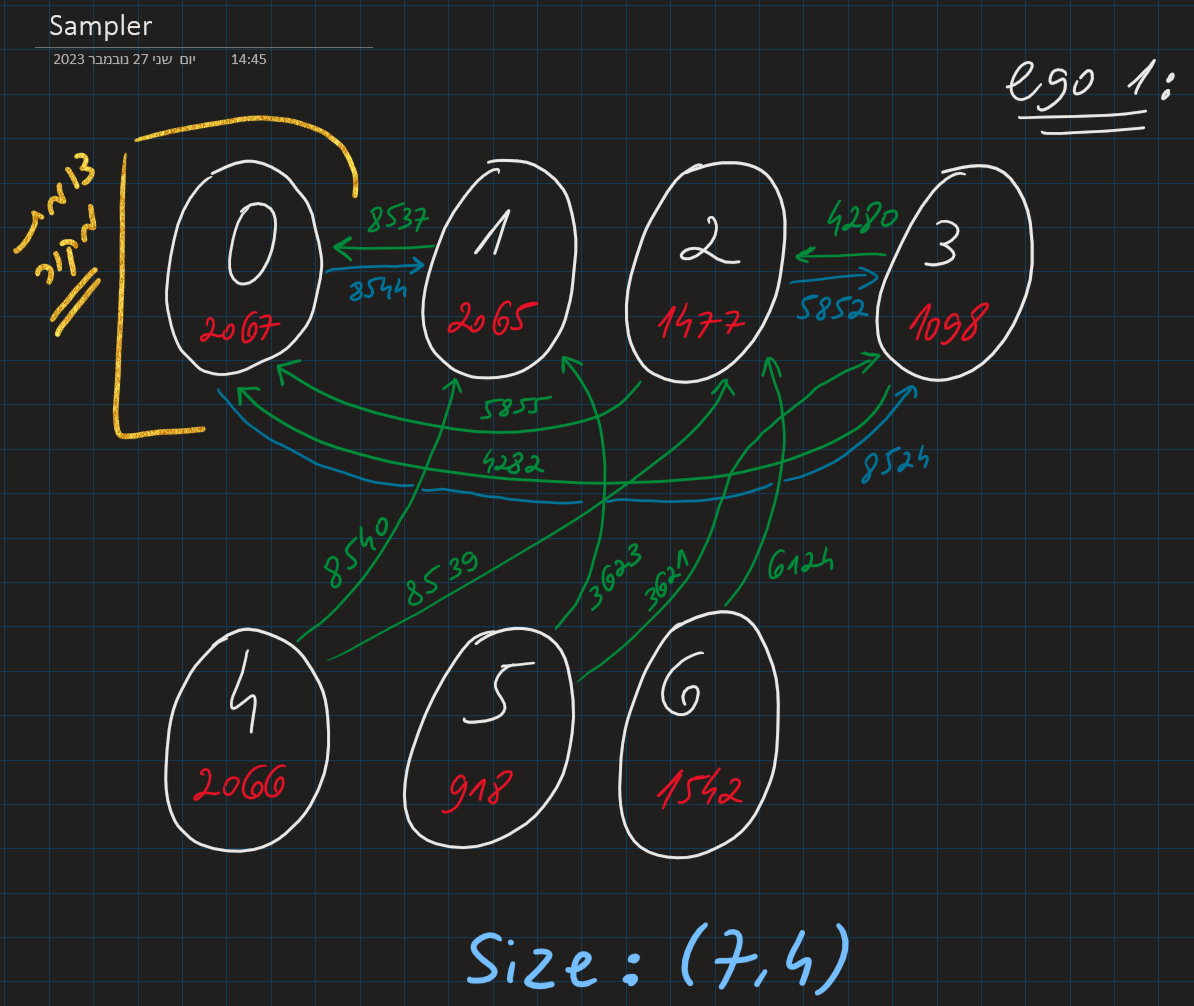

Ego2:
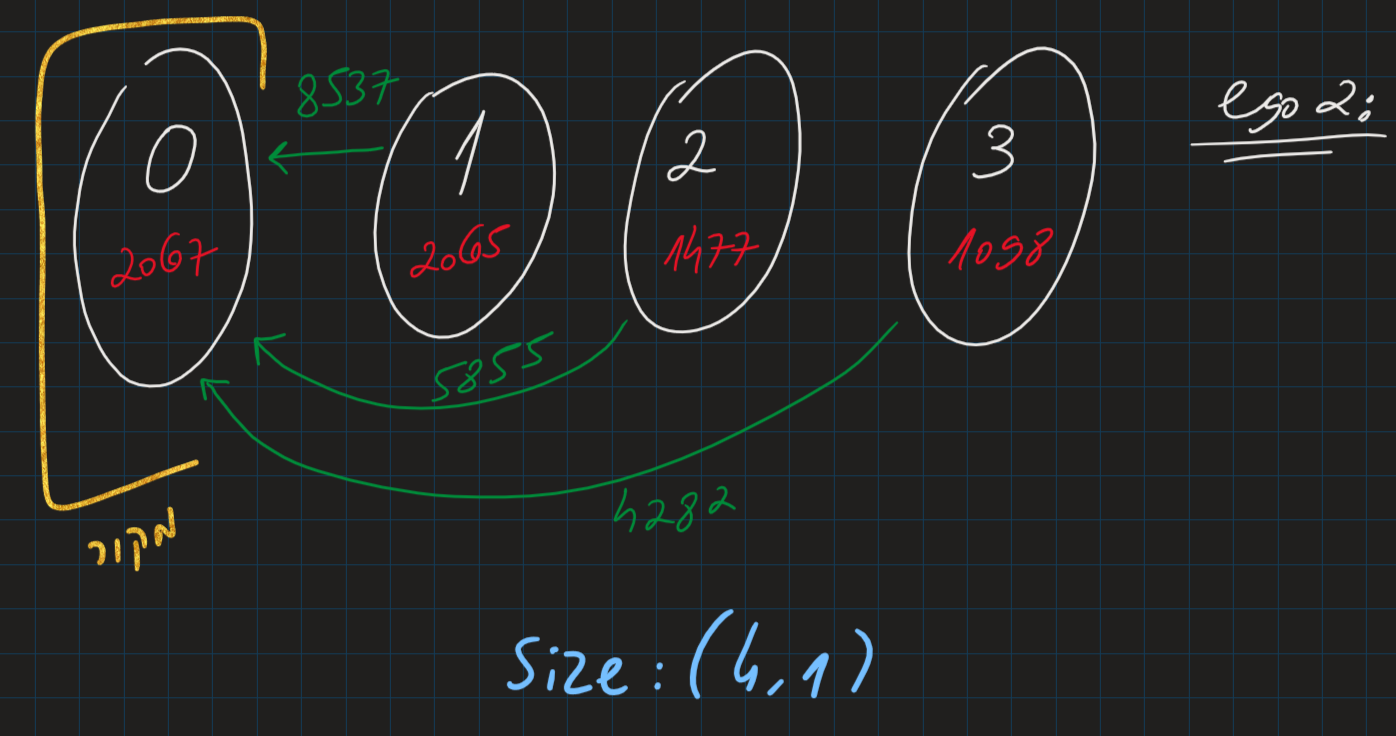

**n_id =>  the IDs of all nodes involved in the computation.

**tuple of `(edge_index, e_id, size)` =>

      1.where `edge_index`  represents the bipartite edges between source and target nodes.
      2.where `e_id`  denotes the IDs of original edges in the full graph.
      3.where `size`  holds the shape of the bipartite graph.

In [19]:
cnt=0
for s in sampler:
    cnt+=1

print(cnt)

2708


In [20]:
items = []
for s in sampler:
    items.append(process_samples(s[0], s[1], s[2])) 

print(items[0][0])
print(items[0][0].size())
print(items[0][1])
print(items[0][2])
print(items[0][2].to_dense().bool())

    

/tmp/ipykernel_29161/4068328694.py:7: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  edge_sp_adj = torch.sparse.FloatTensor(edge_index,


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([3, 1433])
tensor(4)
tensor(indices=tensor([[0, 0, 1, 2],
                       [1, 2, 0, 0]]),
       values=tensor([1., 1., 1., 1.]),
       size=(3, 3), nnz=4, layout=torch.sparse_coo)
tensor([[False,  True,  True],
        [ True, False, False],
        [ True, False, False]])


Dataset before pos_embeddings => x, y, adj, attn_bias, spatial_pos, in_degree, out_degree

In [ ]:
import numpy as np
import pyximport
pyximport.install(setup_args={'include_dirs': np.get_include()})
import algos

item=items[0]
x, y, adj = item[0], item[1], item[2].to_dense()
N = x.size(0)

# node adj matrix [N, N] bool
adj = adj.bool()

shortest_path_result, path = algos.floyd_warshall(adj.numpy())
spatial_pos = torch.from_numpy((shortest_path_result)).long()
attn_bias = torch.zeros([N, N], dtype=torch.float)

in_degree = adj.long().sum(dim=1).view(-1)
out_degree = adj.long().sum(dim=0).view(-1)

print('x:')
print(x)
print(x.size())
print('y:')
print(y)
print('adj:')
print(adj)
print(adj.size())

In [ ]:
print('spatial_pos:')
print(spatial_pos)
print(spatial_pos.size())
print('attn_bias:')
print(attn_bias)
print(attn_bias.size())
print('in_degree:')
print(in_degree)
print(in_degree.size())
print('out_degree:')
print(out_degree)
print(out_degree.size())

Compute positional embeddings:

In [ ]:
num_heads = 8
graph_attn_bias = attn_bias.clone()
graph_attn_bias = graph_attn_bias.unsqueeze(1).repeat(1,num_heads, 1, 1)  # [n_graph, n_head, n_node, n_node]
print(graph_attn_bias.size())

log regression :

    1. x => [2078,64] => [nodes,features] 
    2. y => [2078] => [class labels]
    3. classfier size => [64 , 7]
    4. log_regression(x, y, dataset, evaluator, split='cora', num_epochs=3000)['acc']
        4.1 every 20 epoch checking the test_acc and val_acc -> [1000,1]

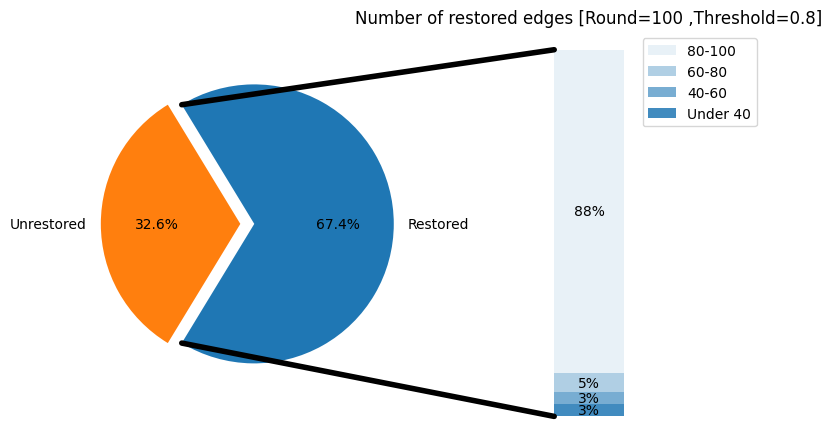

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# Load the results
with open('results_R=100_T=0.8.pkl', 'rb') as f:
        correct_edges, manipulation_edges = pickle.load(f)

# count the number of 5 inside correct_edges
top1G = np.count_nonzero((correct_edges >= 80) & (correct_edges <= 100))
top2G = np.count_nonzero((correct_edges >= 60) & (correct_edges < 80))
top3G = np.count_nonzero((correct_edges >= 40) & (correct_edges < 60))
top4G = len(correct_edges) - top1G - top2G - top3G

top1G = top1G/len(correct_edges)
top2G = top2G/len(correct_edges)
top3G = top3G/len(correct_edges)
top4G = top4G/len(correct_edges)

#counts all the values in the correct_edges
correct = np.count_nonzero(correct_edges)
mani = np.count_nonzero(manipulation_edges)
total = correct+mani
p1=correct/total
p2=mani/total

# pie chart parameters
overall_ratios = [p1,p2]
labels = ['Restored', 'Unrestored']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [top4G, top3G, top2G, top1G]
age_labels = ['Under 40', '40-60', '60-80', '80-100']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Number of restored edges [Round=100 ,Threshold=0.8]')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [5]:
import torch

# build empty dict with key 1 to 10
dict = {}
for i in range(1,11):
    dict[i] = 0

print(dict)

# create vector at size of 1 on 64
a = torch.ones(1,64)
print(a)

dict[10]=a

print(dict)


{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])}


In [2]:
import numpy as np
import pickle

def saveToLocalFile (FileName , dataToSave) :
    with open(FileName, 'wb') as f:
        pickle.dump((dataToSave), f)

def loadFromLocalFile (FileName) :
    # Load the results
    with open(FileName, 'rb') as f:
        localFile= pickle.load(f)

    return localFile

# rounds = 7
# threshold = 0.95

# # Save the results of correct_edges_final
# resultsFileName='results_R={}_T={}.pkl'.format(rounds,threshold)
# correct_edges_final = loadFromLocalFile(resultsFileName)

# #Save the results of roundsAccuracies
# roundsAccuraciesFileName='roundsAccuracies_R={}_T={}.pkl'.format(rounds,threshold)
# roundsAccuracies = loadFromLocalFile(roundsAccuraciesFileName)

# #count how much not zero in the correct_edges_final
# num_nonzero = np.count_nonzero(correct_edges_final)
# print('num_nonzero ->',num_nonzero)

# #print size of accuracy
# print('size of roundsAccuracies ->',len(roundsAccuracies))

In [12]:
#how much correct edges
cnt_correct_edges = np.zeros(100 , dtype=int)
for i in range(100) :
    cnt_correct_edges[i] = np.count_nonzero(correct_edges_final == i)

print('cnt_correct_edges ->',cnt_correct_edges)

#print the accuracy of each round
print('roundsAccuracies ->',roundsAccuracies)

cnt_correct_edges -> [3726 1441  111    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
roundsAccuracies -> [0.95864262990456, 0.937037037037037]


In [29]:
rounds = 50
threshold = 0.9

# Save the results of correct_edges_final
resultsFileName='results_R={}_T={}_R1.pkl'.format(rounds,threshold)
correct_edges_final1 = loadFromLocalFile(resultsFileName)

print('correct_edges_final ->',correct_edges_final1.shape)

#Save the results of roundsAccuracies
roundsAccuraciesFileName='roundsAccuracies_R={}_T={}_R1.pkl'.format(rounds,threshold)
roundsAccuracies1 = loadFromLocalFile(roundsAccuraciesFileName)

#count how much not zero in the correct_edges_final
num_nonzero = np.count_nonzero(correct_edges_final1)
print('num_nonzero ->',num_nonzero)

#print size of accuracy
print('size of roundsAccuracies ->',len(roundsAccuracies1))

correct_edges_final -> (5806,)
num_nonzero -> 5803
size of roundsAccuracies -> 50


In [30]:
rounds = 50
threshold = 0.9

# Save the results of correct_edges_final
resultsFileName='results_R={}_T={}_R2.pkl'.format(rounds,threshold)
correct_edges_final2 = loadFromLocalFile(resultsFileName)

print('correct_edges_final ->',correct_edges_final2.shape)

#Save the results of roundsAccuracies
roundsAccuraciesFileName='roundsAccuracies_R={}_T={}_R2.pkl'.format(rounds,threshold)
roundsAccuracies2 = loadFromLocalFile(roundsAccuraciesFileName)

#count how much not zero in the correct_edges_final
num_nonzero = np.count_nonzero(correct_edges_final2)
print('num_nonzero ->',num_nonzero)

#print size of accuracy
print('size of roundsAccuracies ->',len(roundsAccuracies2))

correct_edges_final -> (5806,)
num_nonzero -> 5805
size of roundsAccuracies -> 50


In [4]:
rounds = 30
threshold = 0.9

# Save the results of correct_edges_final
resultsFileName='results_R={}_T={}_R3.pkl'.format(rounds,threshold)
correct_edges_final3 = loadFromLocalFile(resultsFileName)

print('correct_edges_final ->',correct_edges_final3.shape)

#Save the results of roundsAccuracies
roundsAccuraciesFileName='roundsAccuracies_R={}_T={}_R3.pkl'.format(rounds,threshold)
roundsAccuracies3 = loadFromLocalFile(roundsAccuraciesFileName)

#count how much not zero in the correct_edges_final
num_nonzero = np.count_nonzero(correct_edges_final3)
print('num_nonzero ->',num_nonzero)

#print size of accuracy
print('size of roundsAccuracies ->',len(roundsAccuracies3))

correct_edges_final -> (5806,)
num_nonzero -> 5772
size of roundsAccuracies -> 30


In [5]:
rounds = 20
threshold = 0.9

# Save the results of correct_edges_final
resultsFileName='results_R={}_T={}_R4.pkl'.format(rounds,threshold)
correct_edges_final4 = loadFromLocalFile(resultsFileName)

print('correct_edges_final ->',correct_edges_final4.shape)

#Save the results of roundsAccuracies
roundsAccuraciesFileName='roundsAccuracies_R={}_T={}_R4.pkl'.format(rounds,threshold)
roundsAccuracies4 = loadFromLocalFile(roundsAccuraciesFileName)

#count how much not zero in the correct_edges_final
num_nonzero = np.count_nonzero(correct_edges_final4)
print('num_nonzero ->',num_nonzero)

#print size of accuracy
print('size of roundsAccuracies ->',len(roundsAccuracies4))

correct_edges_final -> (5806,)
num_nonzero -> 5622
size of roundsAccuracies -> 20


In [31]:
correct_edges_final = correct_edges_final1 + correct_edges_final2 
roundsAccuracies = roundsAccuracies1 + roundsAccuracies2 

#count how much not zero in the correct_edges_final
num_nonzero = np.count_nonzero(correct_edges_final)
print('num_nonzero ->',num_nonzero)

#print size of accuracy
print('size of roundsAccuracies ->',len(roundsAccuracies))

num_nonzero -> 5806
size of roundsAccuracies -> 100


In [32]:
for i in range(5806):
    if correct_edges_final[i] != 0:
        print(i, correct_edges_final[i])

0 17
1 13
2 19
3 17
4 13
5 13
6 11
7 13
8 23
9 20
10 19
11 13
12 15
13 12
14 15
15 19
16 19
17 22
18 20
19 18
20 16
21 22
22 15
23 16
24 19
25 16
26 19
27 19
28 23
29 12
30 10
31 12
32 17
33 11
34 7
35 9
36 16
37 12
38 15
39 11
40 11
41 12
42 19
43 16
44 17
45 16
46 17
47 14
48 10
49 18
50 19
51 13
52 18
53 17
54 14
55 19
56 20
57 21
58 16
59 18
60 19
61 17
62 16
63 20
64 16
65 11
66 14
67 17
68 18
69 15
70 15
71 16
72 18
73 12
74 15
75 16
76 20
77 14
78 18
79 8
80 19
81 20
82 13
83 18
84 12
85 12
86 10
87 14
88 18
89 15
90 10
91 9
92 11
93 10
94 19
95 10
96 17
97 13
98 12
99 15
100 17
101 17
102 18
103 25
104 20
105 20
106 13
107 17
108 13
109 10
110 10
111 19
112 16
113 19
114 15
115 17
116 14
117 11
118 9
119 13
120 16
121 9
122 11
123 14
124 12
125 12
126 7
127 12
128 13
129 18
130 18
131 16
132 18
133 15
134 21
135 21
136 18
137 19
138 16
139 19
140 17
141 19
142 18
143 15
144 19
145 9
146 8
147 12
148 10
149 19
150 16
151 30
152 27
153 17
154 14
155 11
156 10
157 20
158 21
159 16

In [33]:
rounds = 100
threshold = 0.9
l1=0
l2=100

resultsFileName='results_R={}_T={}.pkl'.format(rounds,threshold)
saveToLocalFile(resultsFileName,correct_edges_final)

roundsAccuraciesFileName='roundsAccuracies_R={}_T={}.pkl'.format(rounds,threshold)
saveToLocalFile(roundsAccuraciesFileName,roundsAccuracies)

######### final results #######################
cnt_correct_edges -> [  0   0   0   2   1   4  15  26  57 117 197 307 382 500 572 619 616 507
 521 433 317 232 163  92  56  34  15   8   7   3   1   1   0   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
avgAcc -> 0.9997895550464174


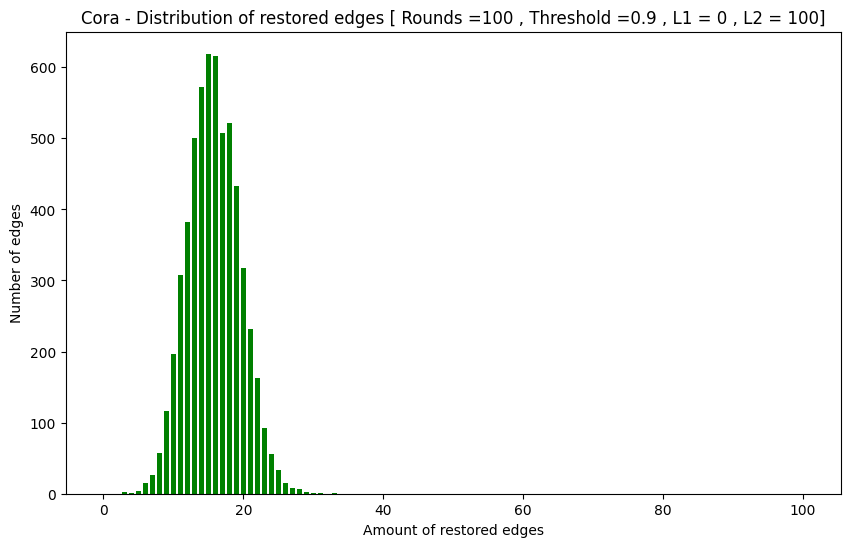

In [34]:
import matplotlib.pyplot as plt

#how much correct edges
cnt_correct_edges = np.zeros(rounds+1 , dtype=int)
for i in range(0,rounds+1) :
    cnt_correct_edges[i] = np.count_nonzero(correct_edges_final == i)

print('######### final results #######################')
print('cnt_correct_edges ->',cnt_correct_edges)

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(cnt_correct_edges)), cnt_correct_edges ,color='green' , width=0.7)
plt.xlabel('Amount of restored edges')
plt.ylabel('Number of edges')
plt.title('Cora - Distribution of restored edges [ Rounds ={} , Threshold ={} , L1 = {} , L2 = {}]'.format(rounds,threshold,l1,l2))
# Set the scale step of the x-axis
# plt.xticks(np.arange(0, 101, 10))
# Save the figure
plt.savefig('histogramCorrect_R={}_T={}.png'.format(rounds,threshold))


#count average accuracy
avgAcc = sum(roundsAccuracies)/len(roundsAccuracies)
print('avgAcc ->',avgAcc)

In [35]:

np.savetxt('correct_edges_final.txt', correct_edges_final , fmt='%i')
np.savetxt('cnt_correct_edges.txt', cnt_correct_edges , fmt='%i')

# Save roundsAccuracies to a txt file
with open('roundsAccuracies.txt', 'w') as f:
    for item in roundsAccuracies:
        f.write("%s\n" % item)

In [36]:
def add_edge_values(file1, file2, output_file):
    with open(file1, 'r') as f1, open(file2, 'r') as f2, open(output_file, 'w') as out:
        for line1, line2 in zip(f1, f2):
            bool_val1, edge_val1 = line1.split()
            bool_val2, edge_val2 = line2.split()

            # Ensure the boolean values are the same
            assert bool_val1 == bool_val2, "Boolean values are not the same"

            # Add the edge values
            edge_val = int(edge_val1) + int(edge_val2)

            # Write the result to the output file
            out.write(f'{bool_val1} {edge_val}\n')

# Usage
add_edge_values('mani_edges2_R=50_T=0.9_R1.txt', 'mani_edges2_R=50_T=0.9_R2.txt', 'mani_edges_R=100_T=0.9.txt')

In [3]:
dataset.data.edge_index.shape[1]

/home/madars/.local/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:289: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


10556

First Group [x,y] edge's:

In [18]:
oneWayCnt=0
edgesOneWay = {}
# get only directed edges
for i in range(dataset.data.edge_index.shape[1]):
    if dataset.data.edge_index[0, i] < dataset.data.edge_index[1, i]:
        print(dataset.data.edge_index[0, i], dataset.data.edge_index[1, i])
        edgesOneWay[oneWayCnt] = (dataset.data.edge_index[0, i], dataset.data.edge_index[1, i])
        oneWayCnt = oneWayCnt+1


/home/madars/.local/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:289: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


tensor(0) tensor(633)
tensor(0) tensor(1862)
tensor(0) tensor(2582)
tensor(1) tensor(2)
tensor(1) tensor(652)
tensor(1) tensor(654)
tensor(2) tensor(332)
tensor(2) tensor(1454)
tensor(2) tensor(1666)
tensor(2) tensor(1986)
tensor(3) tensor(2544)
tensor(4) tensor(1016)
tensor(4) tensor(1256)
tensor(4) tensor(1761)
tensor(4) tensor(2175)
tensor(4) tensor(2176)
tensor(5) tensor(1629)
tensor(5) tensor(1659)
tensor(5) tensor(2546)
tensor(6) tensor(373)
tensor(6) tensor(1042)
tensor(6) tensor(1416)
tensor(6) tensor(1602)
tensor(7) tensor(208)
tensor(8) tensor(269)
tensor(8) tensor(281)
tensor(8) tensor(1996)
tensor(9) tensor(723)
tensor(9) tensor(2614)
tensor(10) tensor(476)
tensor(10) tensor(2545)
tensor(11) tensor(1655)
tensor(11) tensor(1839)
tensor(12) tensor(1001)
tensor(12) tensor(1318)
tensor(12) tensor(2661)
tensor(12) tensor(2662)
tensor(13) tensor(1701)
tensor(13) tensor(1810)
tensor(14) tensor(158)
tensor(14) tensor(2034)
tensor(14) tensor(2075)
tensor(14) tensor(2077)
tensor(14) 

In [26]:
print('firstGroup length =>',oneWayCnt)
print('edgesOneWay length =>',len(edgesOneWay))

firstGroup length => 5278
edgesOneWay length => 5278


Second Group [y,x] edge's:

In [27]:
secondWayCnt=0
edgesSecondWay = {}
# get only directed edges
for i in range(dataset.data.edge_index.shape[1]):
    if dataset.data.edge_index[0, i] > dataset.data.edge_index[1, i]:
        print(dataset.data.edge_index[0, i], dataset.data.edge_index[1, i])
        edgesSecondWay[secondWayCnt] = (dataset.data.edge_index[0, i], dataset.data.edge_index[1, i])
        secondWayCnt = secondWayCnt+1

/home/madars/.local/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:289: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


tensor(2) tensor(1)
tensor(24) tensor(17)
tensor(39) tensor(22)
tensor(60) tensor(37)
tensor(60) tensor(55)
tensor(84) tensor(75)
tensor(87) tensor(42)
tensor(88) tensor(76)
tensor(99) tensor(26)
tensor(105) tensor(59)
tensor(109) tensor(102)
tensor(122) tensor(26)
tensor(122) tensor(99)
tensor(123) tensor(26)
tensor(123) tensor(99)
tensor(124) tensor(109)
tensor(130) tensor(88)
tensor(133) tensor(109)
tensor(137) tensor(135)
tensor(139) tensor(18)
tensor(139) tensor(103)
tensor(145) tensor(144)
tensor(152) tensor(43)
tensor(153) tensor(109)
tensor(155) tensor(90)
tensor(156) tensor(90)
tensor(156) tensor(155)
tensor(158) tensor(14)
tensor(162) tensor(88)
tensor(163) tensor(47)
tensor(168) tensor(167)
tensor(175) tensor(41)
tensor(176) tensor(109)
tensor(180) tensor(158)
tensor(180) tensor(159)
tensor(183) tensor(182)
tensor(195) tensor(94)
tensor(197) tensor(179)
tensor(201) tensor(24)
tensor(206) tensor(71)
tensor(208) tensor(7)
tensor(210) tensor(55)
tensor(210) tensor(164)
tensor(2

In [28]:
print('secondGroup length =>',secondWayCnt)
print('edgesSecondWay length =>',len(edgesSecondWay))

secondGroup length => 5278
edgesSecondWay length => 5278


Checking each edge at Group One the oppsite is in the other Group Two :

In [32]:
howMuchEgdes=0
for key , val in edgesOneWay.items():
    edgeOp = (val[1],val[0])
    if edgeOp in edgesSecondWay.values():
        print('val =>',val,'edgeOp =>',edgeOp)
        howMuchEgdes = howMuchEgdes+1

val => (tensor(0), tensor(633)) edgeOp => (tensor(633), tensor(0))
val => (tensor(0), tensor(1862)) edgeOp => (tensor(1862), tensor(0))
val => (tensor(0), tensor(2582)) edgeOp => (tensor(2582), tensor(0))
val => (tensor(1), tensor(2)) edgeOp => (tensor(2), tensor(1))
val => (tensor(1), tensor(652)) edgeOp => (tensor(652), tensor(1))
val => (tensor(1), tensor(654)) edgeOp => (tensor(654), tensor(1))
val => (tensor(2), tensor(332)) edgeOp => (tensor(332), tensor(2))
val => (tensor(2), tensor(1454)) edgeOp => (tensor(1454), tensor(2))
val => (tensor(2), tensor(1666)) edgeOp => (tensor(1666), tensor(2))
val => (tensor(2), tensor(1986)) edgeOp => (tensor(1986), tensor(2))
val => (tensor(3), tensor(2544)) edgeOp => (tensor(2544), tensor(3))
val => (tensor(4), tensor(1016)) edgeOp => (tensor(1016), tensor(4))
val => (tensor(4), tensor(1256)) edgeOp => (tensor(1256), tensor(4))
val => (tensor(4), tensor(1761)) edgeOp => (tensor(1761), tensor(4))
val => (tensor(4), tensor(2175)) edgeOp => (tens

In [33]:
print('howMuchEgdes =>',howMuchEgdes)

howMuchEgdes => 5278


In [35]:
#Checking each egeds at Group One the oppsite is in the other Group Two
howMuchEgdes2=0
for i in range(dataset.data.edge_index.shape[1]):
    if dataset.data.edge_index[0, i] < dataset.data.edge_index[1, i]:
        for j in range(dataset.data.edge_index.shape[1]):
            if dataset.data.edge_index[0, j] > dataset.data.edge_index[1, j]:
                if dataset.data.edge_index[0, i] == dataset.data.edge_index[1, j] and dataset.data.edge_index[1, i] == dataset.data.edge_index[0, j]:
                    howMuchEgdes2 = howMuchEgdes2+1
                    print('oneSide =>',dataset.data.edge_index[0, i], dataset.data.edge_index[1, i],'otherSide =>',dataset.data.edge_index[0, j], dataset.data.edge_index[1, j])


oneSide => tensor(0) tensor(633) otherSide => tensor(633) tensor(0)
oneSide => tensor(0) tensor(1862) otherSide => tensor(1862) tensor(0)
oneSide => tensor(0) tensor(2582) otherSide => tensor(2582) tensor(0)
oneSide => tensor(1) tensor(2) otherSide => tensor(2) tensor(1)
oneSide => tensor(1) tensor(652) otherSide => tensor(652) tensor(1)
oneSide => tensor(1) tensor(654) otherSide => tensor(654) tensor(1)
oneSide => tensor(2) tensor(332) otherSide => tensor(332) tensor(2)
oneSide => tensor(2) tensor(1454) otherSide => tensor(1454) tensor(2)
oneSide => tensor(2) tensor(1666) otherSide => tensor(1666) tensor(2)
oneSide => tensor(2) tensor(1986) otherSide => tensor(1986) tensor(2)
oneSide => tensor(3) tensor(2544) otherSide => tensor(2544) tensor(3)
oneSide => tensor(4) tensor(1016) otherSide => tensor(1016) tensor(4)
oneSide => tensor(4) tensor(1256) otherSide => tensor(1256) tensor(4)
oneSide => tensor(4) tensor(1761) otherSide => tensor(1761) tensor(4)
oneSide => tensor(4) tensor(2175) 

KeyboardInterrupt: 

In [37]:
print('howMuchEgdes =>',howMuchEgdes2)

howMuchEgdes => 2498


In [5]:
import torch 
egograph1 = torch.tensor([[[0.6746, 0.1288, 0.4886, 0.3104],
                                            [0.0117, 0.0418, 0.7154, 0.9269],
                                            [0.9016, 0.4975, 0.7908, 0.5868],
                                            [0.6773, 0.1513, 0.9743, 0.2930]]])

print(egograph1.size())

meanVector = egograph1.mean(dim=1, keepdim=False) # mean pooling
print(meanVector.size())

torch.Size([1, 4, 4])
torch.Size([1, 4])


In [10]:
egograph2 = torch.rand(1,4,8)
print(egograph2.size())

print(egograph2[0].size())

meanVector2 = egograph2[0].mean(dim=0, keepdim=True) # mean pooling
print(meanVector2.size())

torch.Size([1, 4, 8])
torch.Size([4, 8])
torch.Size([1, 8])
